In [1]:
import numpy as np
import math
import astropy
import matplotlib.pyplot as plt
from astropy.table import Table
from matplotlib import colormaps
import matplotlib.colors


In [2]:
data_hetvips_gaia = Table.read("hetvips_gaia.fits")
Teff_hetvips_gaia = data_hetvips_gaia['Teff']
logg_hetvips_gaia = data_hetvips_gaia['logg']
FeH_hetvips_gaia = data_hetvips_gaia['[Fe/H]']

data_hetvips_apogee = Table.read("hetvips_apogee.fits")
Teff_hetvips_apogee = data_hetvips_apogee['TEFF']
logg_hetvips_apogee = data_hetvips_apogee['LOGG']
FeH_hetvips_apogee = data_hetvips_apogee['FE_H']

data_hetvips_lamost = Table.read("hetvips_lamost.fits")
Teff_hetvips_lamost = data_hetvips_lamost['TEFF']
logg_hetvips_lamost = data_hetvips_lamost['LOGG']
FeH_hetvips_lamost = data_hetvips_lamost['FEH']

In [3]:
print("in all of the HETVIPS/Gaia Dataset:")
print("min [Fe/H]:")
print(min(data_hetvips_gaia['[Fe/H]']))
print("max [Fe/H]:")
print(max(data_hetvips_gaia['[Fe/H]']))
print("min logg:")
print(min(data_hetvips_gaia['logg']))
print("max logg:")
print(max(data_hetvips_gaia['logg']))
print("min Teff:")
print(min(data_hetvips_gaia['Teff']))
print("max Teff:")
print(max(data_hetvips_gaia['Teff']))

in all of the HETVIPS/Gaia Dataset:
min [Fe/H]:
-4.1408
max [Fe/H]:
0.7976
min logg:
0.217
max logg:
5.2418
min Teff:
2732.2
max Teff:
34999.4


In [4]:
print(matplotlib.scale.get_scale_names())

['asinh', 'function', 'functionlog', 'linear', 'log', 'logit', 'symlog']


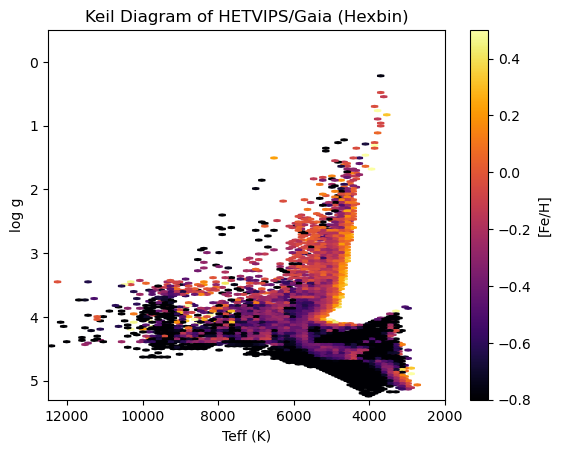

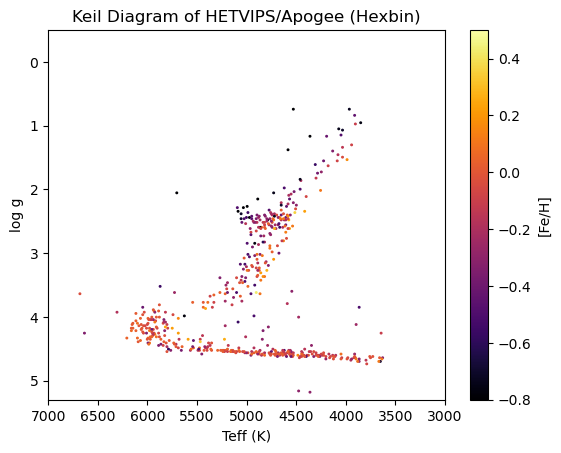

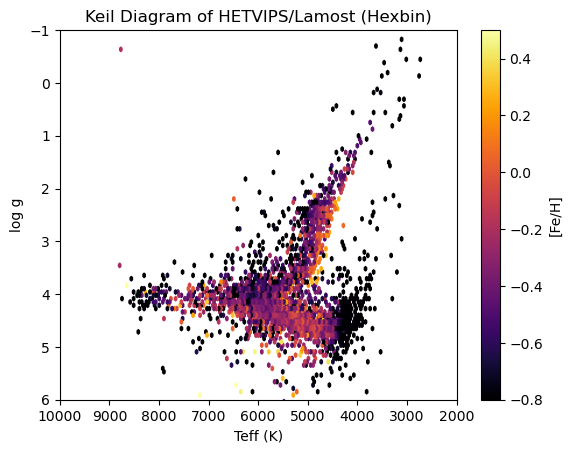

In [5]:


import matplotlib.colors

plt.figure()
cmap = plt.cm.inferno
hb1 = plt.hexbin(Teff_hetvips_gaia,logg_hetvips_gaia, C=FeH_hetvips_gaia, gridsize=(200), cmap=cmap, vmin=-.8, vmax=.5)
plt.title("Keil Diagram of HETVIPS/Gaia (Hexbin)")
plt.xlabel("Teff (K)")
plt.ylabel("log g")
plt.colorbar(hb1, label="[Fe/H]")
ax = plt.gca()
ax.set_xlim([2000, 12500])
ax.set_ylim([-.5, 5.3])
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.savefig(fname="keil_hetvips_gaia_hexbin(1).png")

plt.figure()
cmap = plt.cm.inferno
hb2 = plt.hexbin(Teff_hetvips_apogee,logg_hetvips_apogee, C=FeH_hetvips_apogee, gridsize=(200), cmap=cmap, vmin=-.8, vmax=.5)
plt.title("Keil Diagram of HETVIPS/Apogee (Hexbin)")
plt.xlabel("Teff (K)")
plt.ylabel("log g")
plt.colorbar(hb2, label="[Fe/H]")
ax = plt.gca()
ax.set_xlim([3000, 7000])
ax.set_ylim([-.5, 5.3])
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.savefig(fname="keil_hetvips_apogee_hexbin(1).png")

plt.figure()
cmap = plt.cm.inferno
hb3 = plt.hexbin(Teff_hetvips_lamost,logg_hetvips_lamost, C=FeH_hetvips_lamost, gridsize=(400,8000), cmap=cmap, vmin=-.8, vmax=.5)
plt.title("Keil Diagram of HETVIPS/Lamost (Hexbin)")
plt.xlabel("Teff (K)")
plt.ylabel("log g")
plt.colorbar(hb3, label="[Fe/H]")
ax = plt.gca()
ax.set_xlim([2000, 10000])
ax.set_ylim([-1, 6])
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.savefig(fname="keil_hetvips_lamost_hexbin(1).png")

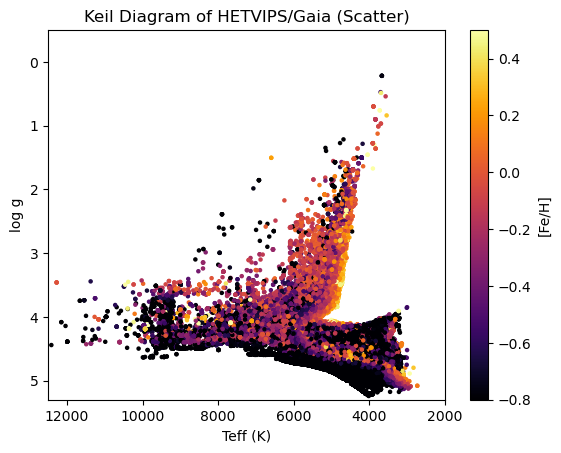

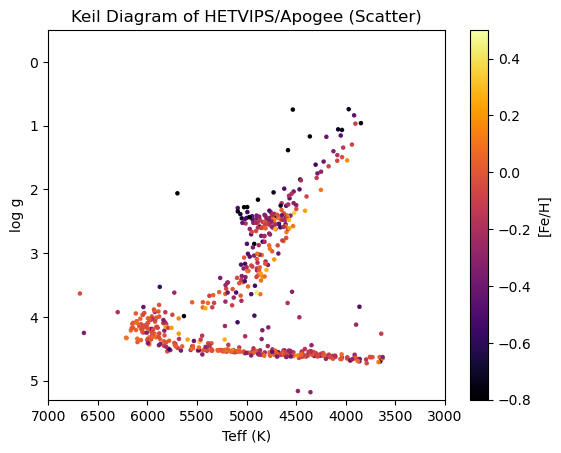

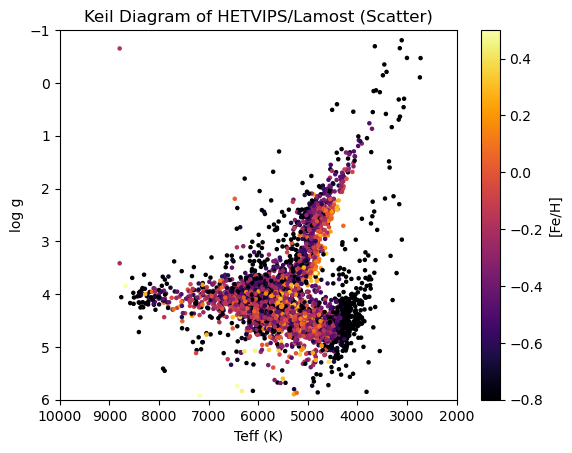

In [6]:
plt.figure()
cmap = plt.cm.inferno
plot = plt.scatter(Teff_hetvips_gaia,logg_hetvips_gaia, s=5, c=data_hetvips_gaia['[Fe/H]'],cmap=cmap, vmin=-.8, vmax=.5)
plt.title("Keil Diagram of HETVIPS/Gaia (Scatter)")
plt.xlabel("Teff (K)")
plt.ylabel("log g")
plt.colorbar(plot, label="[Fe/H]")
ax = plt.gca()
ax.set_xlim([2000, 12500])
ax.set_ylim([-.5, 5.3])
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.savefig(fname="keil_hetvips_gaia(1).png")

plt.figure()
cmap = plt.cm.inferno
plot = plt.scatter(Teff_hetvips_apogee,logg_hetvips_apogee, s=5, c=data_hetvips_apogee['FE_H'],cmap=cmap, vmin=-.8, vmax=.5)
plt.title("Keil Diagram of HETVIPS/Apogee (Scatter)")
plt.xlabel("Teff (K)")
plt.ylabel("log g")
plt.colorbar(plot, label="[Fe/H]")
ax = plt.gca()
ax.set_xlim([3000, 7000])
ax.set_ylim([-.5, 5.3])
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.savefig(fname="keil_hetvips_apogee(1).png")


plt.figure()
cmap = plt.cm.inferno
plot = plt.scatter(Teff_hetvips_lamost,logg_hetvips_lamost, s=5, c=data_hetvips_lamost['FEH'],cmap=cmap, vmin=-.8, vmax=.5)
plt.title("Keil Diagram of HETVIPS/Lamost (Scatter)")
plt.xlabel("Teff (K)")
plt.ylabel("log g")
plt.colorbar(plot, label="[Fe/H]")
ax = plt.gca()
ax.set_xlim([2000, 10000])
ax.set_ylim([-1, 6])
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.savefig(fname="keil_hetvips_lamost(1).png")


In [7]:
print((data_hetvips_gaia["[Fe/H]"])[0:7])
print(len(data_hetvips_gaia["[Fe/H]"]))

 [Fe/H]
  dex  
-------
-0.7656
     --
     --
     --
 0.0712
-0.2261
     --
378630


In [8]:
print(data_hetvips_lamost[:0])

objID  RA Dec shotid gmag rmag ... ecl_lon ecl_lat dist Separation_2 Separation
                               ...   deg     deg           arcsec      arcsec  
----- --- --- ------ ---- ---- ... ------- ------- ---- ------------ ----------


In [9]:
print("in all of the HETVIPS/Lamost Dataset:")
print("min logg:")
print(min(data_hetvips_lamost['LOGG']))
print("max logg:")
print(max(data_hetvips_lamost['LOGG']))
print("min Teff:")
print(min(data_hetvips_lamost['TEFF']))
print("max Teff:")
print(max(data_hetvips_lamost['TEFF']))

print("min SNR_U:")
print(min(data_hetvips_lamost['SNR_U']))
print("max SNR_U:")
print(max(data_hetvips_lamost['SNR_U']))
print("min SNR_G:")
print(min(data_hetvips_lamost['SNR_G']))
print("max SNR_G:")
print(max(data_hetvips_lamost['SNR_G']))
print("min SNR_R:")
print(min(data_hetvips_lamost['SNR_R']))
print("max SNR_R:")
print(max(data_hetvips_lamost['SNR_R']))
print("min SNR_I:")
print(min(data_hetvips_lamost['SNR_I']))
print("max SNR_I:")
print(max(data_hetvips_lamost['SNR_I']))
print("min SNR_Z:")
print(min(data_hetvips_lamost['SNR_Z']))
print("max SNR_Z:")
print(max(data_hetvips_lamost['SNR_Z']))

in all of the HETVIPS/Lamost Dataset:
min logg:
-999.0
max logg:
8.240515
min Teff:
-9999.0
max Teff:
8792.6
min SNR_U:
0.0
max SNR_U:
153.48
min SNR_G:
0.0
max SNR_G:
511.44
min SNR_R:
0.0
max SNR_R:
647.18
min SNR_I:
0.0
max SNR_I:
786.41
min SNR_Z:
0.0
max SNR_Z:
754.28


In [10]:

lamost_flag_mask =  np.where((data_hetvips_lamost["LOGG"] > 1) & (data_hetvips_lamost["LOGG"] < 5) & (data_hetvips_lamost["TEFF"] < 25000) & (data_hetvips_lamost["SNR_G"] > 5) & (data_hetvips_lamost["RV_ERR"] < 10) & (data_hetvips_lamost["FEH_ERR"] < .2) & (abs(data_hetvips_lamost["RV"]) < 600))
fixed_hetvips_lamost = data_hetvips_lamost[lamost_flag_mask]

print(len(fixed_hetvips_lamost))

#there is an issue with the SNRs

New_Teff_hetvips_lamost = fixed_hetvips_lamost['TEFF']
New_logg_hetvips_lamost = fixed_hetvips_lamost['LOGG']
New_FeH_hetvips_lamost = fixed_hetvips_lamost['FEH']

print("in all of the HETVIPS/Lamost Dataset:")
print("min logg:")
print(min(fixed_hetvips_lamost['LOGG']))
print("max logg:")
print(max(fixed_hetvips_lamost['LOGG']))
print("min Teff:")
print(min(fixed_hetvips_lamost['TEFF']))
print("max Teff:")
print(max(fixed_hetvips_lamost['TEFF']))

print(len(fixed_hetvips_lamost))

#& (data_hetvips_lamost["CHI2RATIO"] < 10)

#print("in all of the HETVIPS/Lamost Dataset:")
#print("min logg:")
#print(min(New_logg_hetvips_lamost))
#print("max logg:")
#print(max(New_logg_hetvips_lamost))
#print("min Teff:")
#print(min(New_Teff_hetvips_lamost))
#print("max Teff:")
#print(max(New_Teff_hetvips_lamost))

3351
in all of the HETVIPS/Lamost Dataset:
min logg:
1.0129092
max logg:
4.991424
min Teff:
3600.609
max Teff:
8760.441
3351


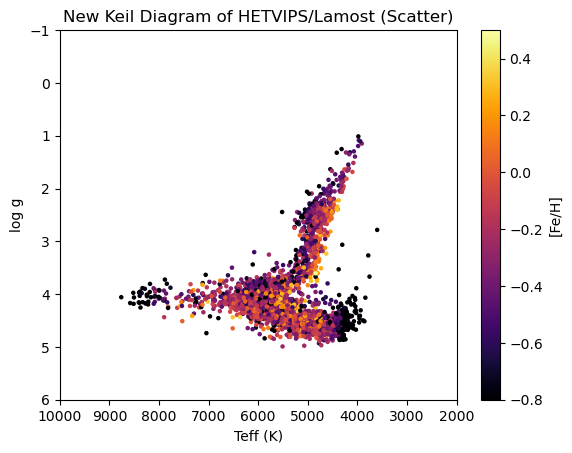

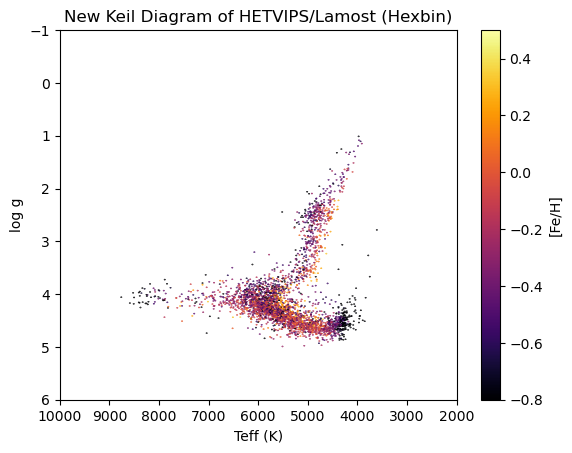

In [11]:
plt.figure()
cmap = plt.cm.inferno
plot = plt.scatter(New_Teff_hetvips_lamost,New_logg_hetvips_lamost, s=5, c=fixed_hetvips_lamost['FEH'],cmap=cmap, vmin=-.8, vmax=.5)
plt.title("New Keil Diagram of HETVIPS/Lamost (Scatter)")
plt.xlabel("Teff (K)")
plt.ylabel("log g")
plt.colorbar(plot, label="[Fe/H]")
ax = plt.gca()
ax.set_xlim([2000, 10000])
ax.set_ylim([-1, 6])
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.savefig(fname="New_keil_hetvips_lamost(1).png")

plt.figure()
cmap = plt.cm.inferno
hb4 = plt.hexbin(New_Teff_hetvips_lamost,New_logg_hetvips_lamost, C=New_FeH_hetvips_lamost, gridsize=(400,8000), cmap=cmap, vmin=-.8, vmax=.5)
plt.title("New Keil Diagram of HETVIPS/Lamost (Hexbin)")
plt.xlabel("Teff (K)")
plt.ylabel("log g")
plt.colorbar(hb4, label="[Fe/H]")
ax = plt.gca()
ax.set_xlim([2000, 10000])
ax.set_ylim([-1, 6])
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.savefig(fname="New_keil_hetvips_lamost_hexbin(1).png")


1571764
1571764


Text(0, 0.5, 'Flux')

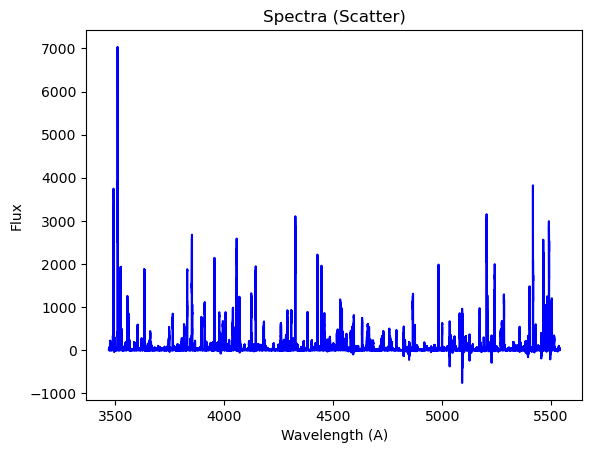

In [32]:
spectra_data = Table.read("hetvips_lamost_spectras.fits")
spectra = spectra_data['spec']
spectra = spectra[~np.isnan(spectra)]

n=0
flux_length = len([spectra][n])
print(flux_length)
wavelength_shape = np.linspace(3470,5540,flux_length)
print(len(wavelength_shape))

plt.figure()
plot = plt.plot(wavelength_shape,[spectra][n], color="blue")
plt.title("Spectra (Scatter)")
plt.xlabel("Wavelength (A)")
plt.ylabel("Flux")

#need to normalize it, reading papers to see what to dooooo